In [41]:
import geopandas as gpd
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors

In [23]:
# load data from local files
merit = gpd.read_file('/Users/joshpaul/arctic_rivers/AK_Rivers.gpkg')
merit = merit[['COMID', 'geometry']]

q_ds = xr.open_dataset('/Users/joshpaul/arctic_rivers/2050_fC2LE4_Q.nc')

# on Chinook, these files are located in /import/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data

In [18]:
# grab some data from July 1, 2050 and create a new dataframe with the COMIDs and flow values
q_df = pd.DataFrame({"COMID": q_ds['IRFroutedRunoff'].sel(time='2050-07-01').seg.values,
                "Q": q_ds['IRFroutedRunoff'].sel(time='2050-07-01').values[0]}, )

In [45]:
q_df.head()

,COMID,Q
0,81020252,2.628675
1,81020426,1.583704
2,81020442,1.007815
3,81020575,32.773907
4,81020586,18.484976


In [46]:
merit.head()

,COMID,geometry
0,81000004,"LINESTRING (-155.49250 70.85500, -155.49167 70..."
1,81000005,"LINESTRING (-155.93167 70.84333, -155.93250 70..."
2,81000006,"LINESTRING (-156.10500 70.83750, -156.10583 70..."
3,81000007,"LINESTRING (-156.42833 70.85083, -156.42750 70..."
4,81000011,"LINESTRING (-156.00417 70.90750, -156.00500 70..."


In [27]:
# join the dataframe to the geodataframe
merit_q = merit.merge(q_df, on='COMID')

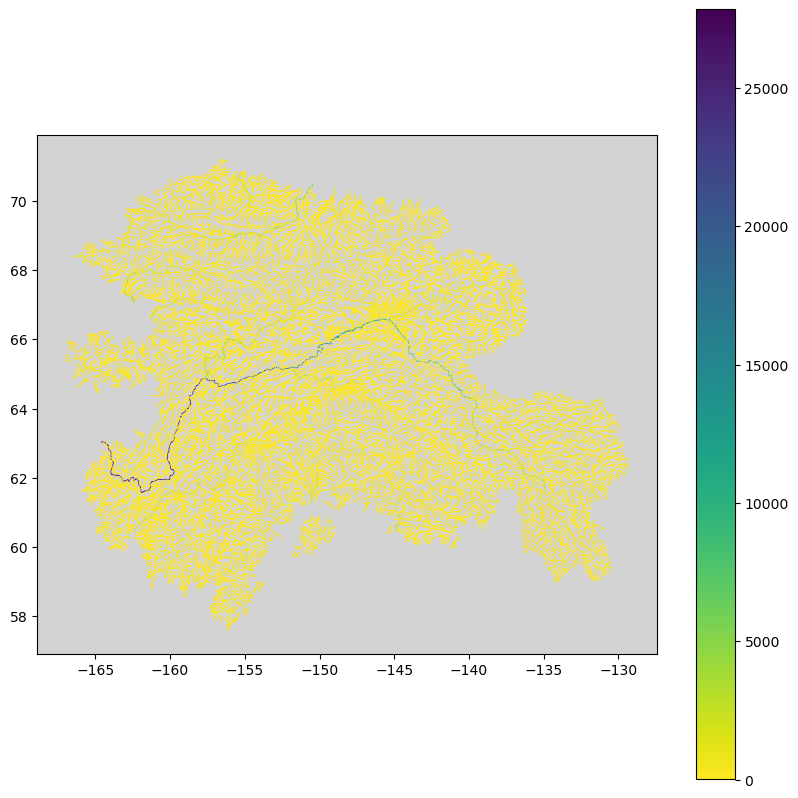

In [44]:
# plot with standard colormap: doesn't look great because so many streams have low flow

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merit_q.plot(ax=ax, 
             column='Q', 
             linewidth = 0.5, 
             cmap='viridis_r', 
             #norm=colors.LogNorm(vmin=merit_q.Q.min(), vmax=merit_q.Q.max()), 
             legend=True)
ax.set_facecolor('lightgray')

Text(0.5, 1.0, 'NCAR Arctic Rivers Dataset:\n Modeled Streamflow (m3/s^2) 7/1/2050')

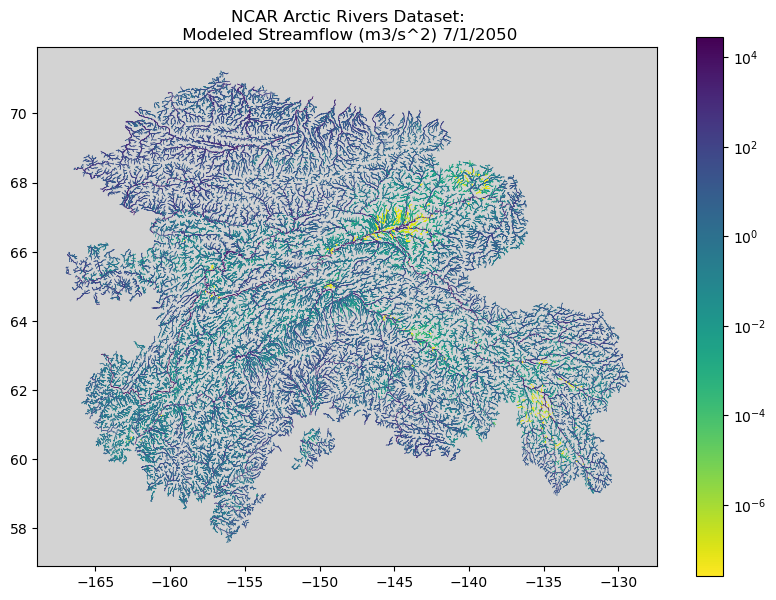

In [53]:
# plot with log scale colormap: looks better

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
merit_q.plot(ax=ax, 
             column='Q', 
             linewidth = 0.5, 
             cmap='viridis_r', 
             norm=colors.LogNorm(vmin=merit_q.Q.min(), vmax=merit_q.Q.max()), 
             legend=True)
ax.set_facecolor('lightgray')

ax.set_title('NCAR Arctic Rivers Dataset:\n Modeled Streamflow (m3/s^2) 7/1/2050')
